<a href="https://colab.research.google.com/github/jsdhami/BuildWithAI/blob/main/Multimodel_Gemini_with_LangChain_and_Google_AI_Studio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gemini Pro with LangChain on Google AI Studio

## Install packages

In [1]:
%pip install --upgrade  langchain langchain-google-genai "langchain[docarray]" faiss-cpu

In [2]:
import os
import getpass
import requests
from PIL import Image
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.vectorstores import DocArrayInMemorySearch
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

from langchain_text_splitters import CharacterTextSplitter
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader

from langchain_core.runnables import RunnableLambda, RunnablePassthrough

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

In [3]:
from langchain_community.vectorstores import FAISS

## Set API Key

In [5]:
if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Provide your Google API Key")

Provide your Google API Key··········


## Custom Functions to load image

In [6]:
def get_image(url, filename, extention):
  content = requests.get(url).content
  with open(f'/content/{filename}.{extention}', 'wb') as f:
    f.write(content)
  image = Image.open(f"/content/{filename}.{extention}")
  image.show()
  return image

def get_text_chunks_langchain(text):
  text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
  docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
  return docs

## Simple LLM chain

In [9]:
llm = ChatGoogleGenerativeAI(model="gemini-pro")
result = llm.invoke("Generate the poem about nepal")
print(result.content)

**Ode to Nepal**

Amidst the Himalayas' lofty peaks,
Where ancient legends gently speak,
There lies a land of beauty rare,
Nepal, a jewel beyond compare.

Its mountains rise like towers grand,
Snowy summits, a sight so planned,
Everest's crown, a majestic sight,
A symphony of nature's might.

The valleys bloom with vibrant hues,
Green fields and flowers, the earth imbues,
Terraced hills, a patchwork bright,
A tapestry of colors, a pure delight.

Through verdant forests, rivers flow,
Their waters clear, a gentle glow,
Fish dance in streams, birds sing sweet,
Nature's harmony, a joyful treat.

Temples and shrines, a sacred sight,
Adorn the land with colors bright,
Pashupatinath, a holy place,
Where pilgrims seek God's boundless grace.

The people of Nepal, warm and kind,
With hearts open, their spirits find,
A rich culture, a vibrant past,
In every smile, a story cast.

From Kathmandu's bustling streets,
To the serene hills, where silence meets,
Nepal's beauty knows no end,
A land where 

## Simple LLM chain with Chat

In [10]:
model = ChatGoogleGenerativeAI(model="gemini-pro")
print(
    model(
    [
        HumanMessage(content="Answer with Simple 'Yes' or 'No'. Question: Is apple a Fruit?"),
    ]
).content
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


Yes


## Multimodal llm chain

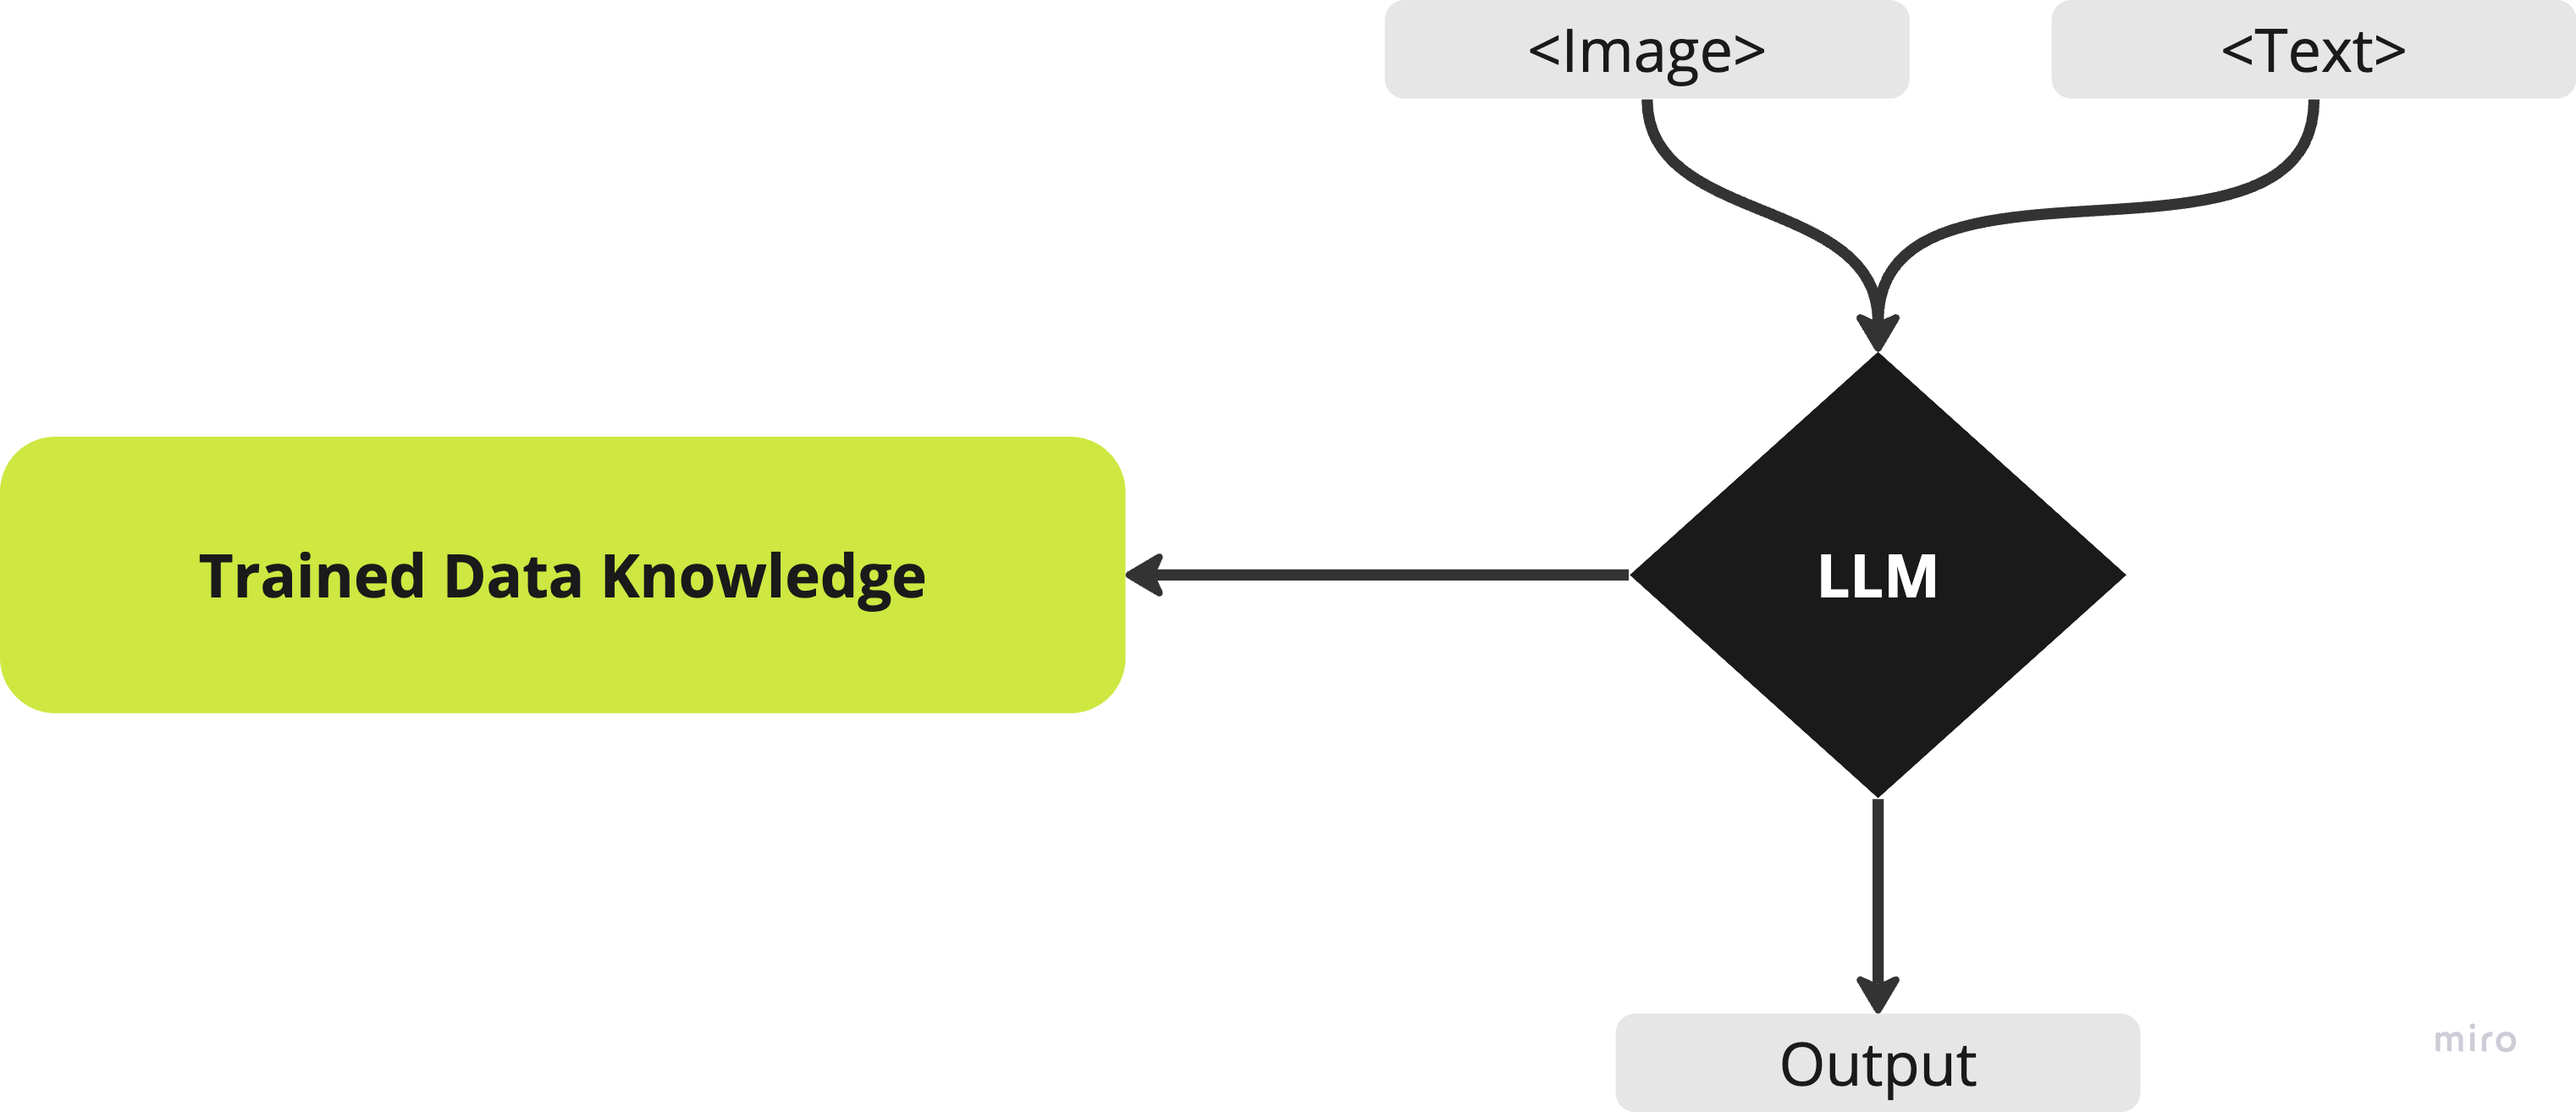

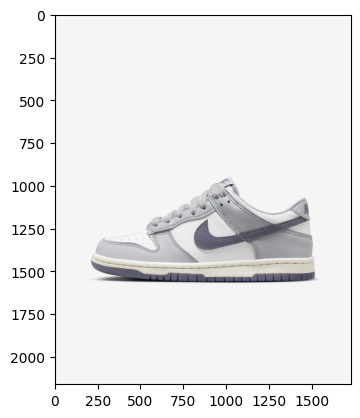

 **Nike Dunk Low**
* Color: White/Neutral Grey/Pale Ivory/Light Smoke Grey
* SKU: DM0187-100
* Price: $110.00


In [11]:
image = get_image("https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png",
                  "nike-01",
                  "png")
plt.imshow(image)
plt.show()

prompt_ocr = """
Extract all the details from the image.
"""

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": prompt_ocr,
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image},
    ]
)
print(
    llm.invoke([message]).content
)

## Mini RAG

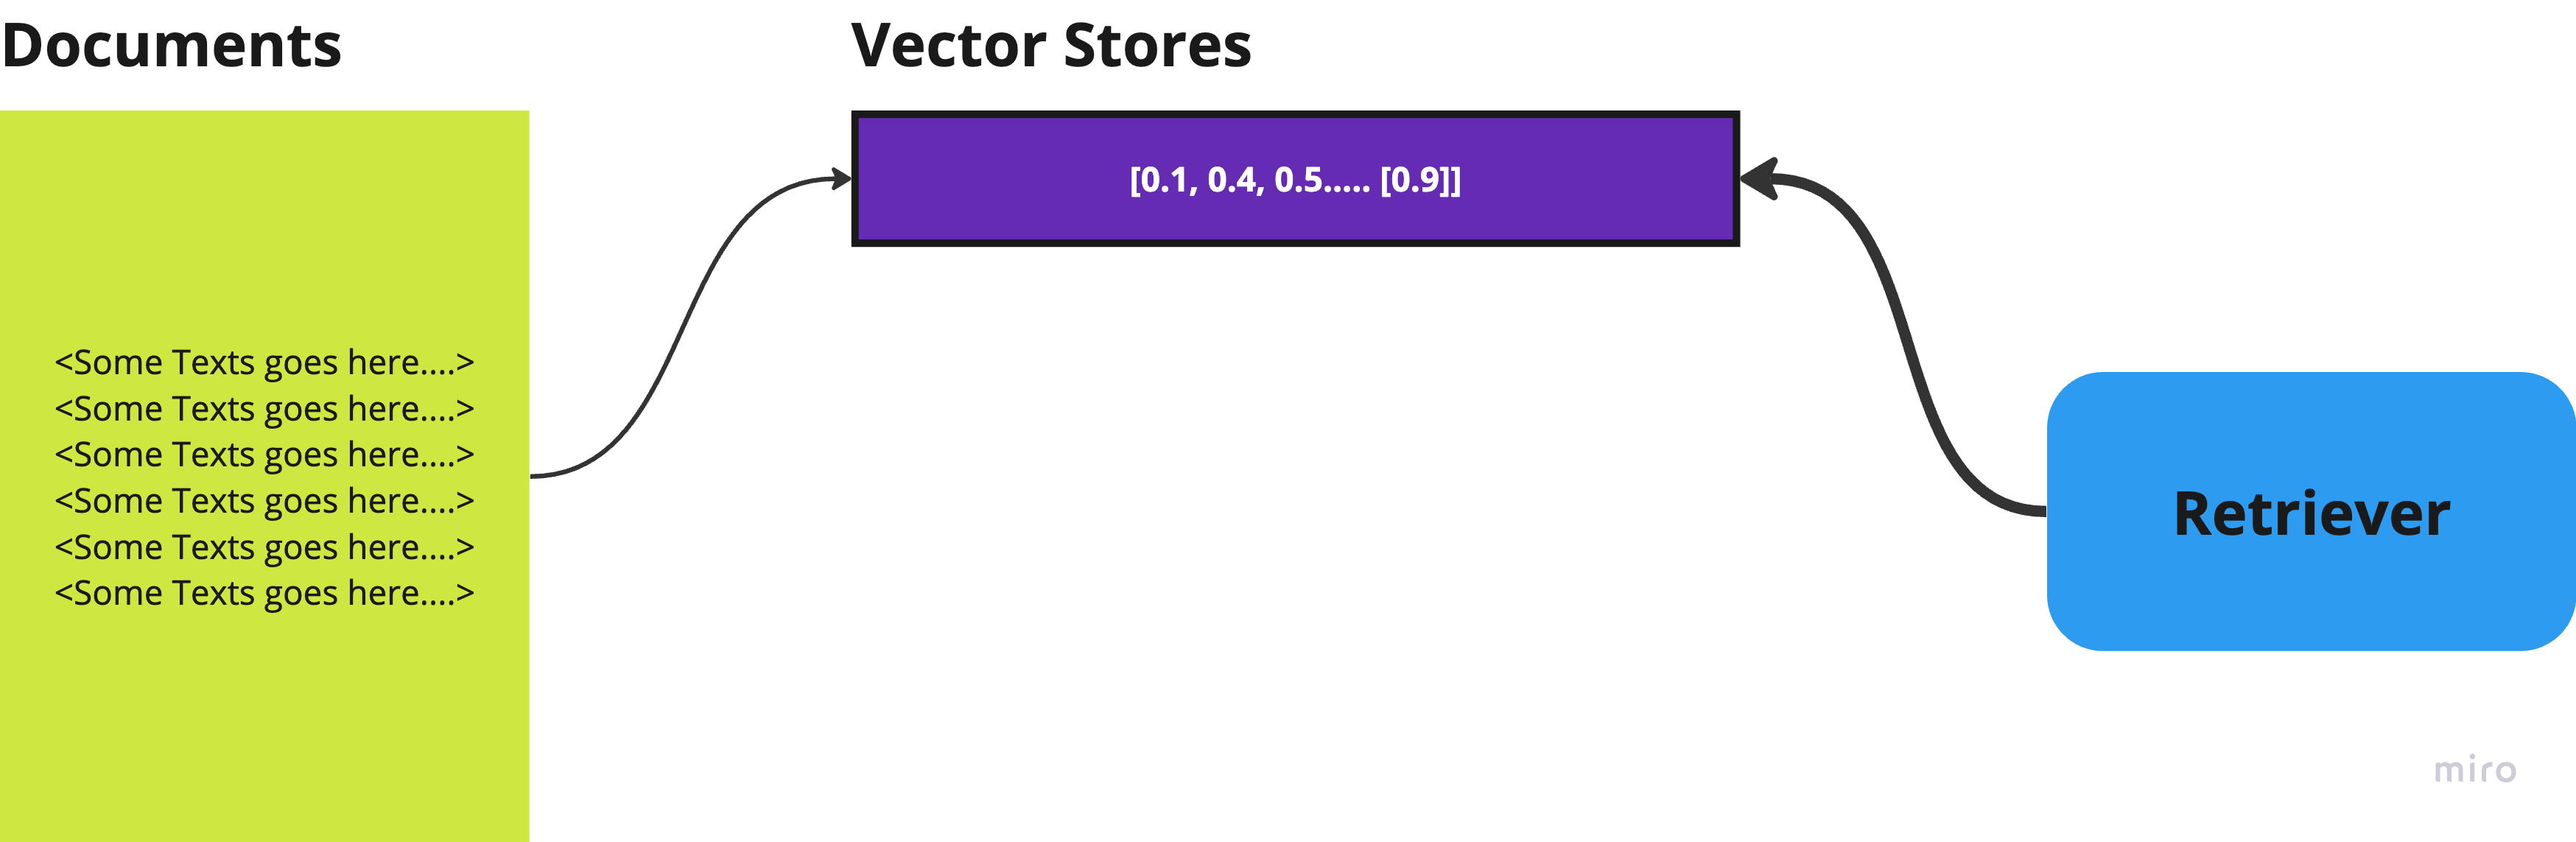

In [12]:
store_information = """

Nike Air Max Plus sneakers. They feature a brown upper with a black Nike Swoosh logo on the side and a visible Air Max unit in the heel. The sole is white.
Here are some more details about the Nike Air Max Plus:
Style: TN
Release date: January 1, 2017
Style code: 852630-300
Original retail price: $150 USD
The Air Max Plus, also known as the TN, is a popular Nike running shoe that was first released in 1998. It is known for its unique design, which includes a gradient upper, visible Air Max units, and a wavy outsole. The TN has been a popular shoe among sneakerheads and casual wearers alike for over two decades.
It features a brown upper with a black Swoosh logo and a white sole. The shoe is currently available for resale on the StockX marketplace for an average price of around $150 USD.
Nike Air Max Plus Store Location: "Kings Way, Kathmandu, Nepal".
\n\n\n



Nike Dunk Low Retro sneakers.
Here are some more details about the Nike Dunk Low Retro:
Style: Low-top
Release date: October 31, 2020
Style code: DD1391-100
Original retail price: $100 USD
The Dunk Low Retro is a popular Nike skateboarding shoe that was first released in 1985. It is a classic silhouette that has been released in a wide variety of colors and materials over the years.
The shoes in the image are currently available for resale on the StockX marketplace for an average price of around $200 USD.
Nike Dunk Low Retro sneakers Store Location: "Patan, Lalitpur, Nepal".
\n\n\n




Nike slide/sandal.
They appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.
Here are some of the features:
Soft, one-piece upper: The upper is made of a soft, synthetic material that provides comfort and support.
Phylon midsole: The midsole is made of Phylon, which provides cushioning and support.
Rubber outsole: The outsole is made of rubber for traction and durability.
Swoosh logo: The Nike Swoosh logo is on the strap of the sandal.
Available in a variety of colors: The Nike Benassi Solarsoft Sandal is available in a variety of colors, including black, white, and beige.
Nike off courte slides store location: "Bhaktapur, Nepal".

"""

docs = get_text_chunks_langchain(store_information)

In [13]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

vectorstore = FAISS.from_documents(docs,
                                   embedding=embeddings)
retriever = vectorstore.as_retriever()

In [14]:
retriever.invoke("slides")

[Document(page_content='Nike slide/sandal.\nThey appear to be the Nike Slide/Sandal, which is a unisex slide/sandal.\nHere are some of the features:\nSoft, one-piece upper: The upper is made of a soft, synthetic material that provides comfort and support.\nPhylon midsole: The midsole is made of Phylon, which provides cushioning and support.\nRubber outsole: The outsole is made of rubber for traction and durability.\nSwoosh logo: The Nike Swoosh logo is on the strap of the sandal.\nAvailable in a variety of colors: The Nike Benassi Solarsoft Sandal is available in a variety of colors, including black, white, and beige.\nNike off courte slides store location: "Bhaktapur, Nepal".'),
 Document(page_content='Nike Dunk Low Retro sneakers.\nHere are some more details about the Nike Dunk Low Retro:\nStyle: Low-top\nRelease date: October 31, 2020\nStyle code: DD1391-100\nOriginal retail price: $100 USD\nThe Dunk Low Retro is a popular Nike skateboarding shoe that was first released in 1985. It 

In [15]:
llm_text = ChatGoogleGenerativeAI(model="gemini-pro")
template = """
```
{context}
```

{information}


Provide brief information and store location.
"""
prompt = ChatPromptTemplate.from_template(template)

rag_chain = (
    {"context": retriever, "information": RunnablePassthrough()}
    | prompt
    | llm_text
    | StrOutputParser()
)

In [17]:
llm_vision = ChatGoogleGenerativeAI(model="gemini-pro-vision", temperature=0.0)
full_chain = (
    RunnablePassthrough() | llm_vision | StrOutputParser() | rag_chain
)

In [18]:
url_1 = "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/b434966d-c850-4aa7-be6c-e99c0e236362/air-max-plus-mens-shoes-3mH52P.png"

url_2 = "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/0f557b1f-ba79-419c-a814-f7b5d117fbb2/dunk-low-retro-shoes-bCzchX.png"

url_3 = "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/252f2db6-d426-4931-80a0-8b7f8f875536/calm-slides-K7mr3W.png"

### Simple RAG

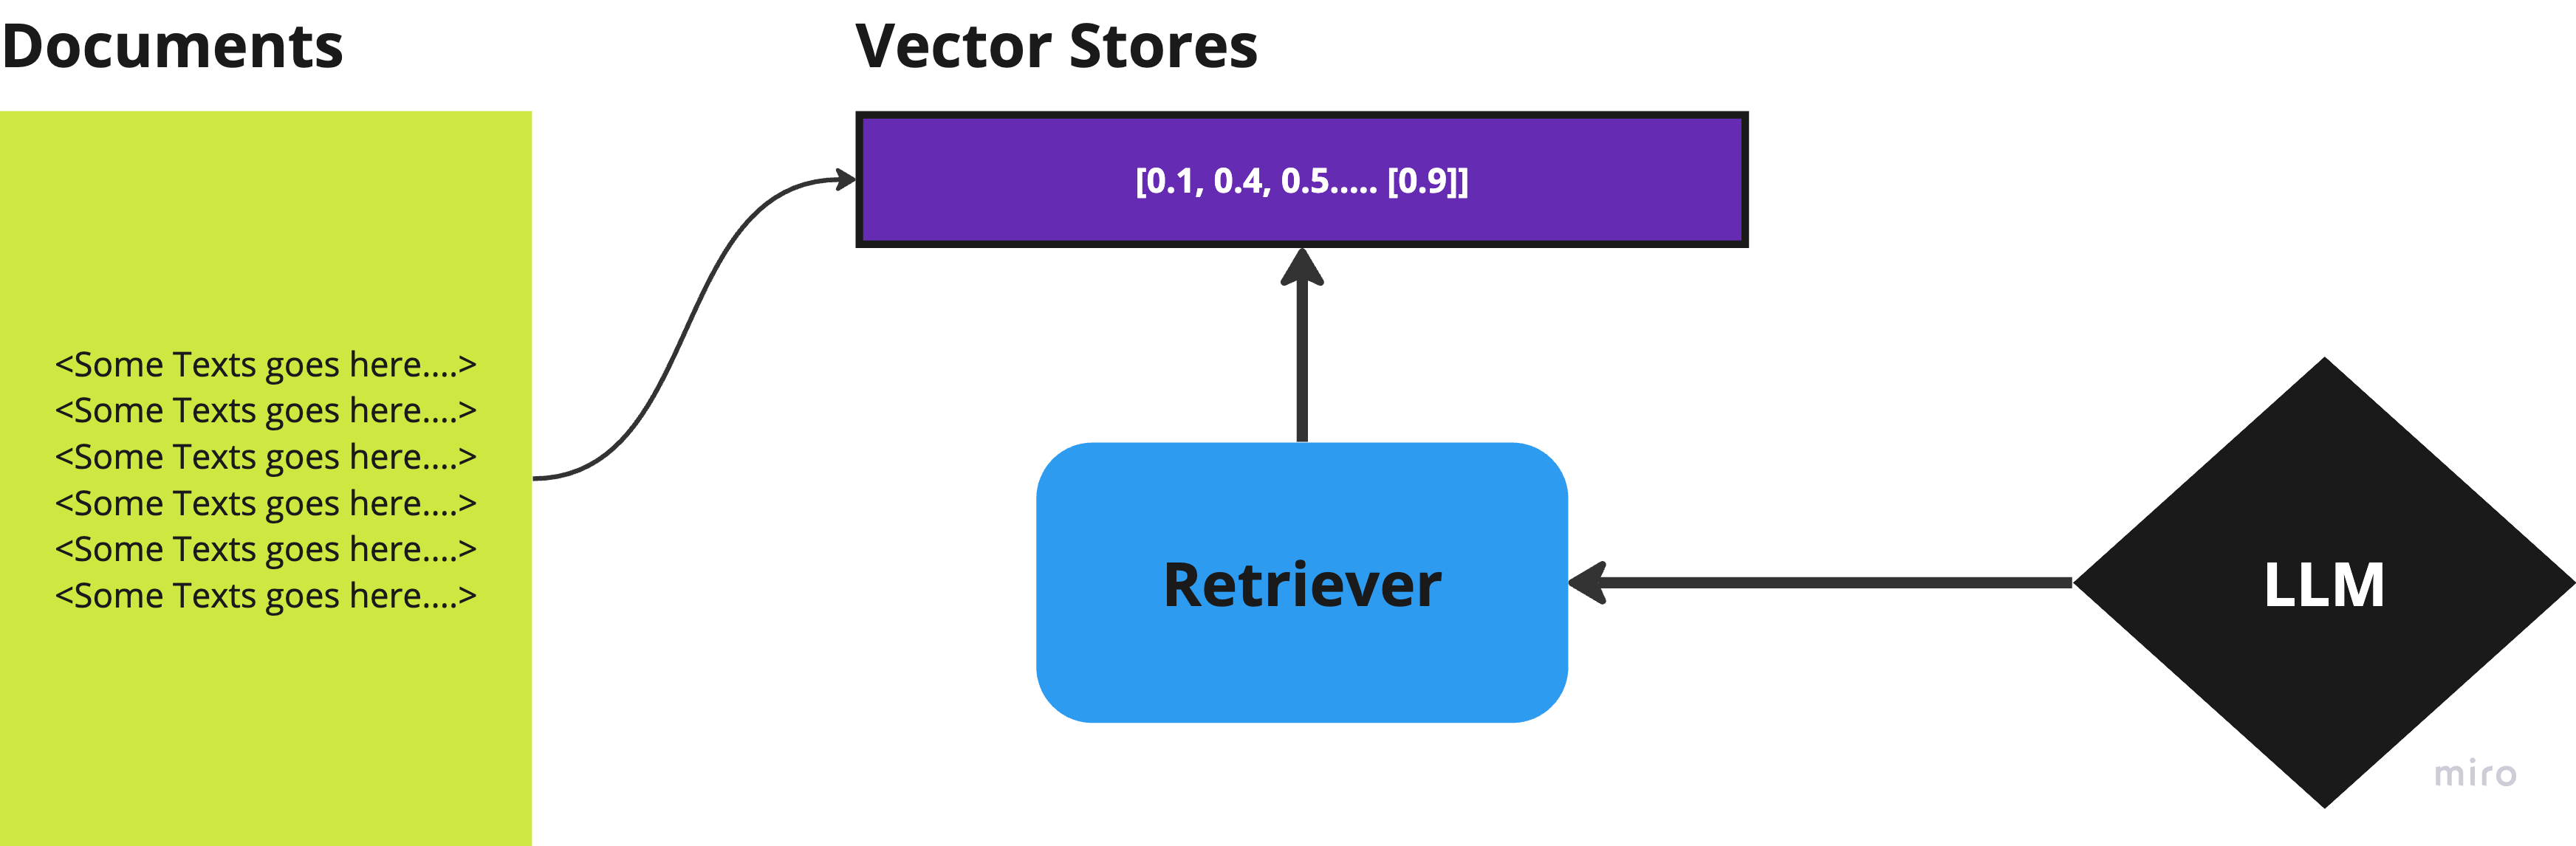

In [19]:
result = rag_chain.invoke("Nike ko sandal paune thau kata chha?")
display(Markdown(result))

Nike Benassi Solarsoft Sandal: Bhaktapur, Nepal

### Image RAG

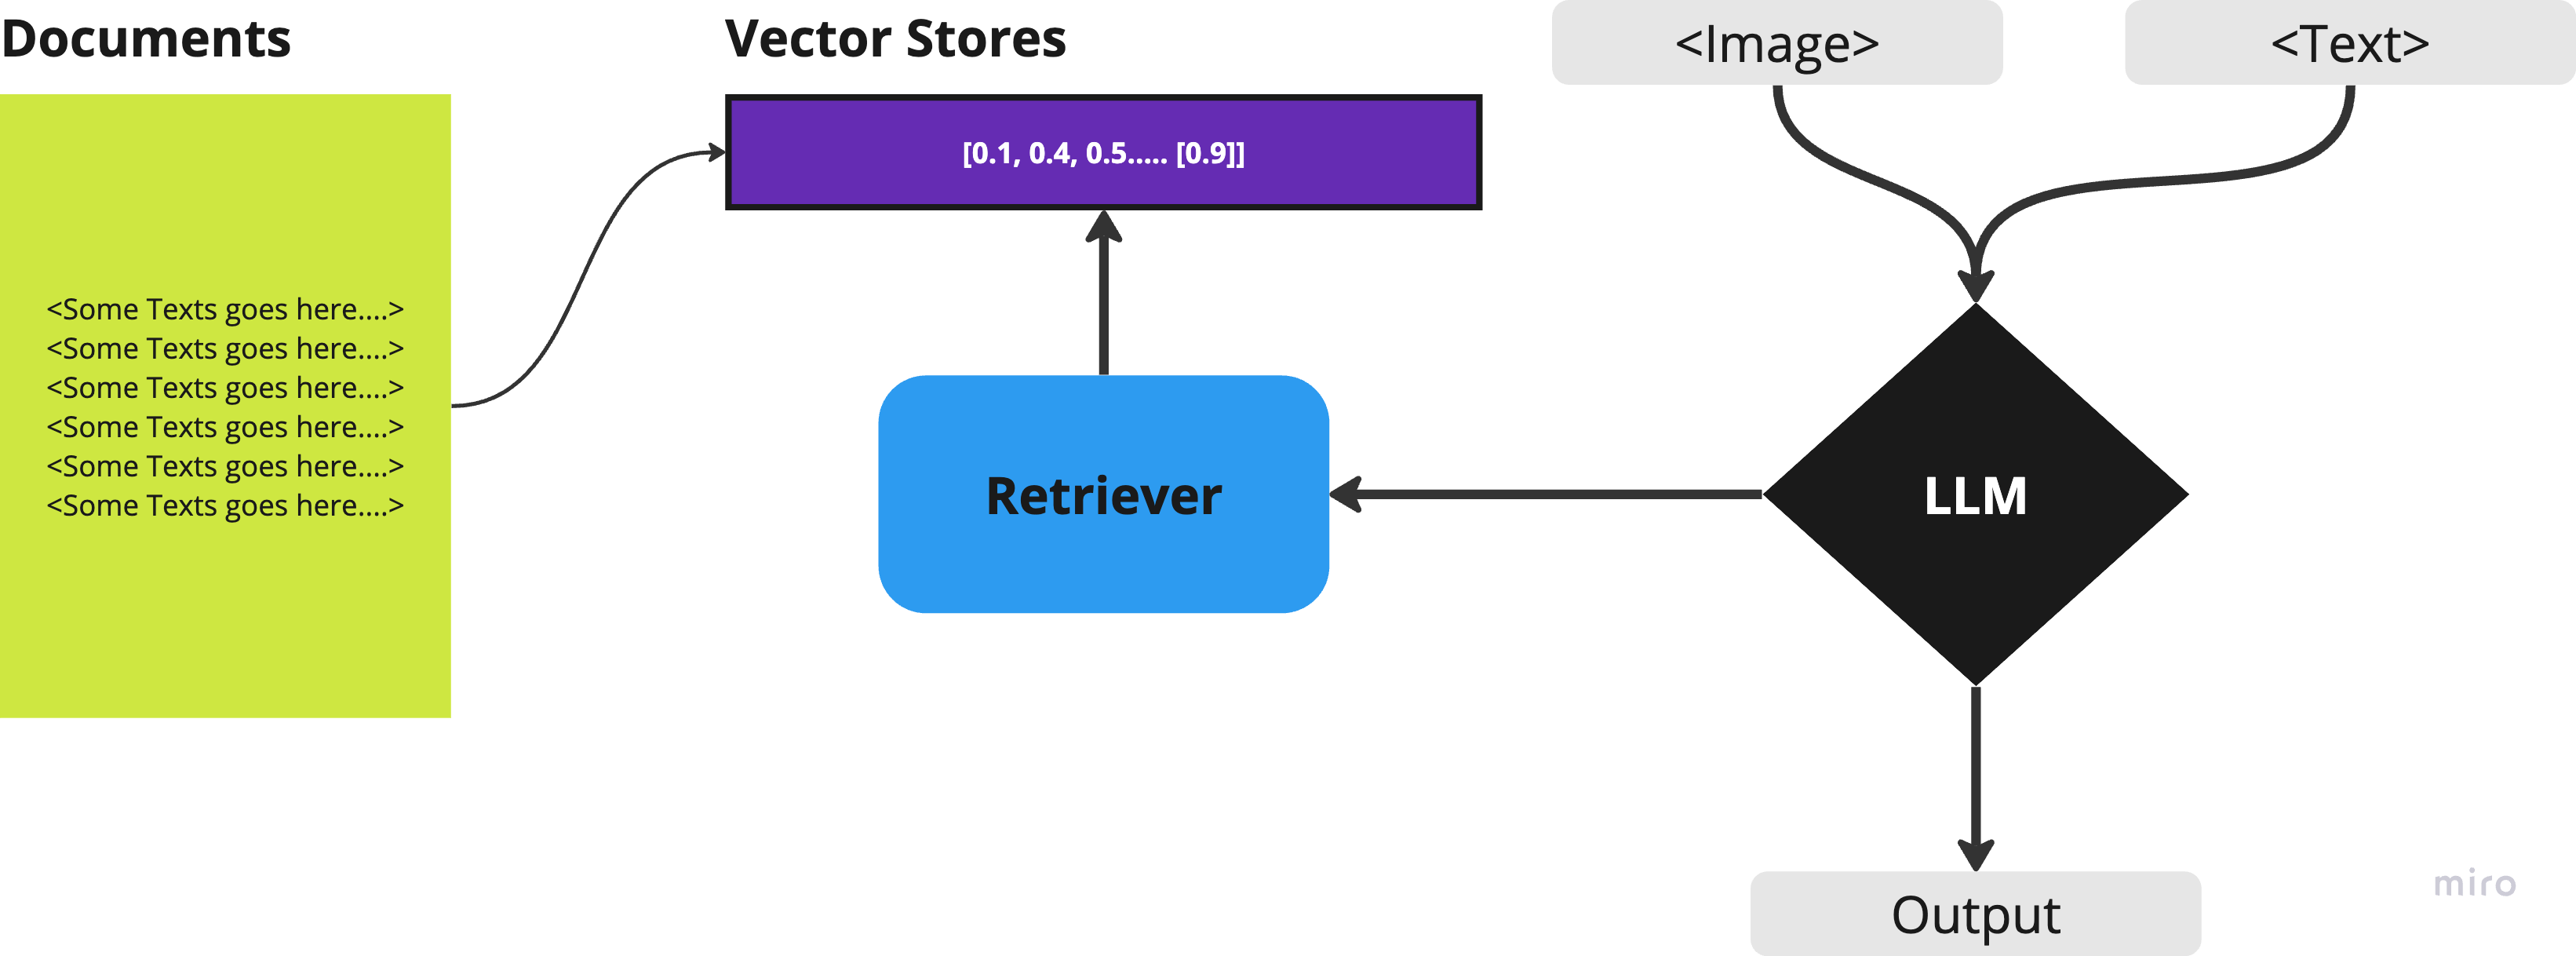

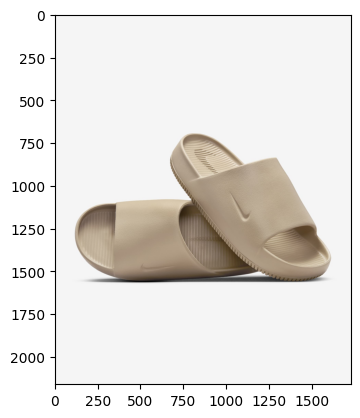

**Nike Offcourt Slide**

* Soft, one-piece upper for comfort and support
* Phylon midsole for cushioning and support
* Rubber outsole for traction and durability
* Swoosh logo on the strap
* Available in a variety of colors

**Store Location:** Bhaktapur, Nepal

In [20]:
image = get_image(url_3, "nike3", "png")
plt.imshow(image)
plt.show()

message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Provide information on given image Brand and model of given sneaker.",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image},
    ]
)


result = full_chain.invoke([message])
display(Markdown(result))